

Lakshmi Bhramara Mutte

About Dataset-

Dataset consists of emails that are classified into spam and ham. This dataset can be used to implement Naive Bayes Algorithm.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/spam.csv",encoding = "ISO-8859-1")

In [3]:
df.shape

(5572, 5)

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dropping the columns: Unnamed: 2,	Unnamed: 3,	Unnamed: 4

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Check for Null values

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

Categories

In [9]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

Converting categorical column-v1 to numerical column with values 0 and 1

0 indicates not spam -ham

1 indicates spam

In [10]:
df['v1']=df['v1'].apply(lambda x:0 if x=='ham' else 1)

In [11]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Checking whether the data is balanced or not.

In [12]:
df['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

The data is not balanced.

<function matplotlib.pyplot.show(close=None, block=None)>

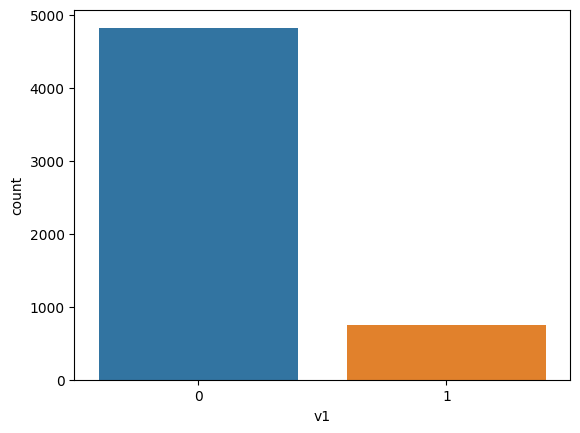

In [13]:
sns.countplot(x='v1', data=df)
plt.show

We see that about 86% of the messages are ham (non-spam), and the remaining 13% are spam.

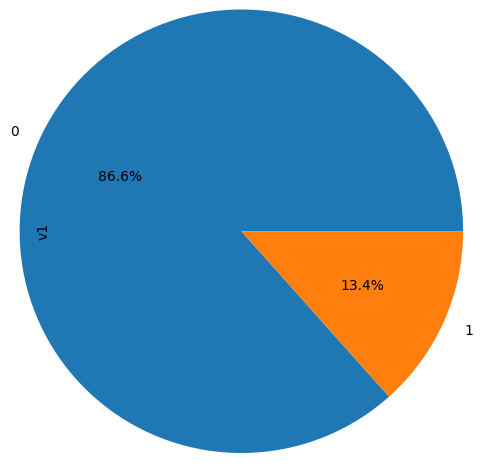

In [14]:
Class=df['v1'].value_counts()
Class.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

In [15]:
df.groupby('v1').describe()

v2                                                               
   count unique                                                top freq
v1                                                                     
0   4825   4516                             Sorry, I'll call later   30
1    747    653  Please call our customer service representativ...    4

The above code gives information about how many spam and ham mails exixts and the number of unique mails and the top frequency mail in both the categories.

We'll randomize the entire dataset before splitting to ensure that spam and ham messages are spread properly throughout the dataset.

In [16]:
df = df.sample(frac=1, random_state=1)

Split the data into training set and testing set.

In [17]:
X=df['v2']
Y=df['v1']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [19]:
x_train

1045                                  Come round, it's . 
5443    You have won a guaranteed 32000 award or maybe...
1042            Easy ah?sen got selected means its good..
3347                               Sorry, I'll call later
2304    Friendship poem: Dear O Dear U R Not Near But ...
                              ...                        
1803                   I'm in class. Did you get my text.
1664                                       ÌÏ v ma fan...
2223    Thanks for your ringtone order, ref number K71...
3682    When did i use soc... I use it only at home......
578     our mobile number has won å£5000, to claim cal...
Name: v2, Length: 4457, dtype: object

Convert the text data into a matrix of token counts- that is sentences are converted into words and its frequency

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Fitting multinomial naive bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

Classifying the testing data

In [23]:
x_test_count=cv.transform(x_test)
y_pred=model.predict(x_test_count)


Finding accuracy of the model

In [24]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
print("Accuracy of the model is:",acc)

Accuracy of the model is: 0.9847533632286996


0.98 is quite good accuracy.

Checking a senctence or an email whether it is spam or ham

In [25]:
mail1 = ['reward money click']
mail1_count = cv.transform(mail1)
pred1 = model.predict(mail1_count)
print(pred1)

[1]


reward money click - is a spam

In [26]:
mail = ['Hello,come to my office']
mail_count = cv.transform(mail)
pred = model.predict(mail_count)
print(pred)

[0]


Hello,come to my office - is a ham